# Linkedin Canada jobs sentiment visualization and scraping - Python

This Python script scrapes up to 100 most recent Linkedin job postings of any job title and creates sentiment visualization in a form of a word cloud.

In [1]:
# Importing libraries and specifying URL and Chrome driver path
import time
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import advertools as adv
import matplotlib.pyplot as plt

# specifying URL and nuber of job postings
postings_name = 'Data Analyst'
position_num = 10  # numbers 1 to 100

# building linkedin link
posit = '%20'.join(postings_name.split())
url = f'https://www.linkedin.com/jobs/search?keywords={posit}&location=Canada&geoId=101174742&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0'

# setting chrome driver path
path = '/Users/dmytrokryvonog/Documents/DAT/gda/gdasent/chromedriver'

In [2]:
# opening url in Chrome browser
driver = webdriver.Chrome(path)
driver.get(url)

# scrolling down the webpage with javascript
# assigning webpage's body height in pixels
previous_height = driver.execute_script('return document.body.scrollHeight')

# scrolling to the end of body tag continuosly until the body height stops increasing
while True:
    # scrolling to the bottom of body height (y coordinate)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    # pausing for 1 sec to load
    time.sleep(1)
    # assigning webpage's increased body height in pixels
    new_height = driver.execute_script('return document.body.scrollHeight')
    # breaking the loop once the body stops growing
    if new_height == previous_height:
        break
    # updating previous height for the next loop
    previous_height = new_height


In [3]:
# extracting hrefs
# specifying a class where hrefs are located
lnks = driver.find_elements_by_class_name('base-card__full-link')

# looping through classes and extracting hrefs into a list
links_list = []
for lnk in lnks[:position_num]:
    link_str = (lnk.get_attribute('href'))
    links_list += [link_str]
# driver.quit()

# previewing list's contents
for y in range(3):
    print(links_list[y])


https://ca.linkedin.com/jobs/view/data-scientist-at-emote-ai-inc-2659505806?refId=%2B%2FlUGeAISeF%2FW2u7w3D2vg%3D%3D&trackingId=%2BWl4niPbo5gjqBiJGBWXgw%3D%3D&position=1&pageNum=0&trk=public_jobs_jserp-result_search-card
https://ca.linkedin.com/jobs/view/data-analyst-at-plenty-of-fish-2658801328?refId=%2B%2FlUGeAISeF%2FW2u7w3D2vg%3D%3D&trackingId=Y8SsVNiIC1nL3s%2BHBWFc%2BQ%3D%3D&position=2&pageNum=0&trk=public_jobs_jserp-result_search-card
https://ca.linkedin.com/jobs/view/data-analyst-at-synoptek-2658805840?refId=%2B%2FlUGeAISeF%2FW2u7w3D2vg%3D%3D&trackingId=%2BHIcZY%2FoMKMKox2HETOrjQ%3D%3D&position=3&pageNum=0&trk=public_jobs_jserp-result_search-card


In [4]:
# scraping URLs' contents and combining into one string
# creating text string
words_str = ''

# try/except to avoid mistakes
try:
    for link in links_list:
        # looping through the links
        req = requests.get(link)
        print(req)
        req = req.text
        # converting to BeautifulSoup
        soup = BeautifulSoup(req, 'lxml')
        # extracting text based in class
        markup = soup.find('div', class_="show-more-less-html__markup").text
        # appending to a string and converting to lowercase
        words_str = f'{words_str} {markup}'.lower()
        # pausing for 1 sec to avoid error 429
        time.sleep(1)
except Exception as e:
    pass

# previewing strings contents
print(words_str[:500])


<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
 
        computer vision, dev ops
       
        we are looking for someone to be a part of our outstanding analytics team, who will be working cross-functionally with the rest of the organization to help identify, understand, and improve business and product challenges facing plenty of fish. the data analyst will deliver high-quality strategic and tactical analysis; collaborating with the product, engineering, data science, business intelligence, customer service, and marketing teams.this rol


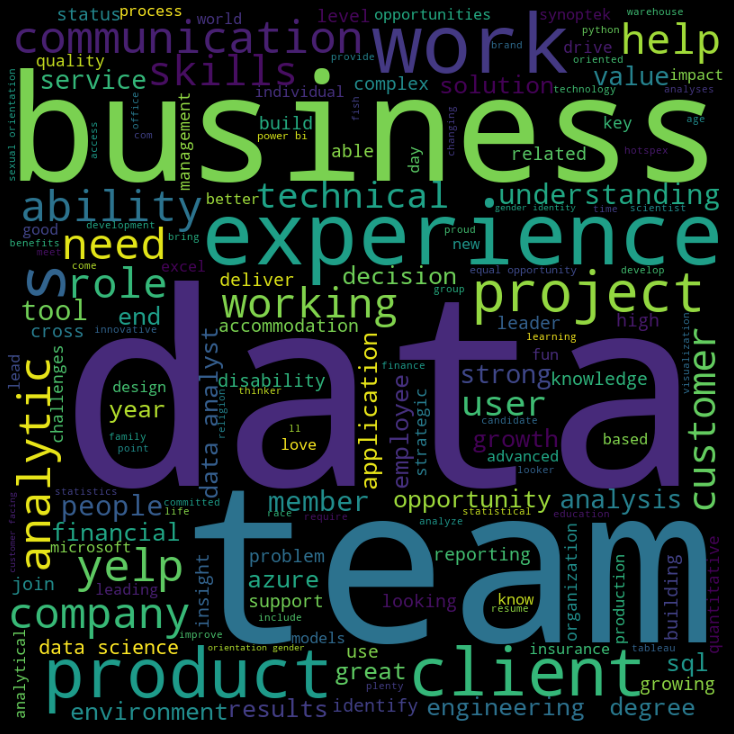

In [5]:
# plotting word cloud
# joining the sets of stopwords: English and French
sw_en_fr = adv.stopwords['english'].union(adv.stopwords['french'])

# generating word cloud with WordCloud module
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=sw_en_fr,
                      min_font_size=10
                      ).generate(words_str)

# plotting the WordCloud image with matplotlib
plt.figure(figsize=(10, 10), facecolor='black')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# assigning file path
p_name = '_'.join(postings_name.split())
f_path = f'pngs/{p_name}-{position_num}.png'
# saving png
plt.savefig(f_path)
# printing the plot
plt.show()